In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=True,index_col=0)

* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
df = df[
    (df["value"] > df["value"].quantile(0.025)) &
    (df["value"] < df["value"].quantile(0.975))
]

## <font color=red>Task 1 (Create a `draw_line_plot` function)</font>

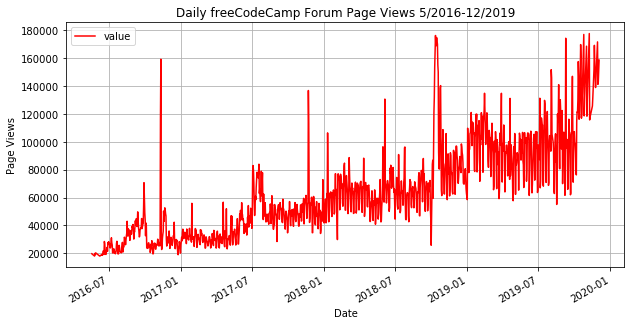

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind='line',y='value',title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", grid=True,fontsize=10, ax=ax,color='red')
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.show()

## <font color=red>Task 2 (Create a `draw_bar_plot` function)</font>

In [5]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df["year"] = df.index.year
df["month"] = df.index.month
df["month"] = df["month"].apply(lambda data: months[data-1])
df["month"] = pd.Categorical(df["month"], categories=months)



In [6]:
df

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


Text(0, 0.5, 'Average Page Views')

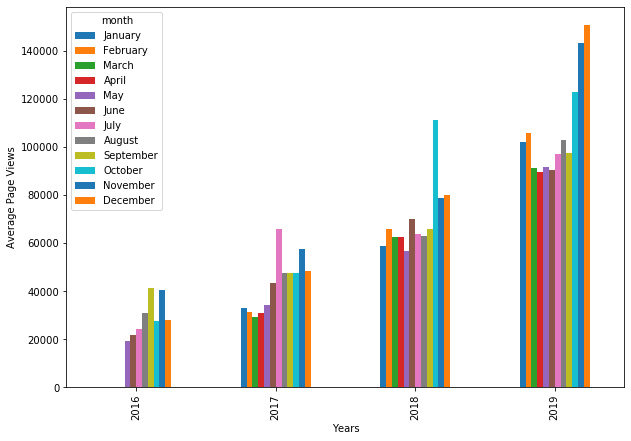

In [7]:
df_pivot = pd.pivot_table(df,values="value",index="year",columns="month",aggfunc=np.mean)
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()

fig.set_size_inches(10, 7)
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

## <font color=red>Task 3 (Create a `draw_box_plot`)</font>

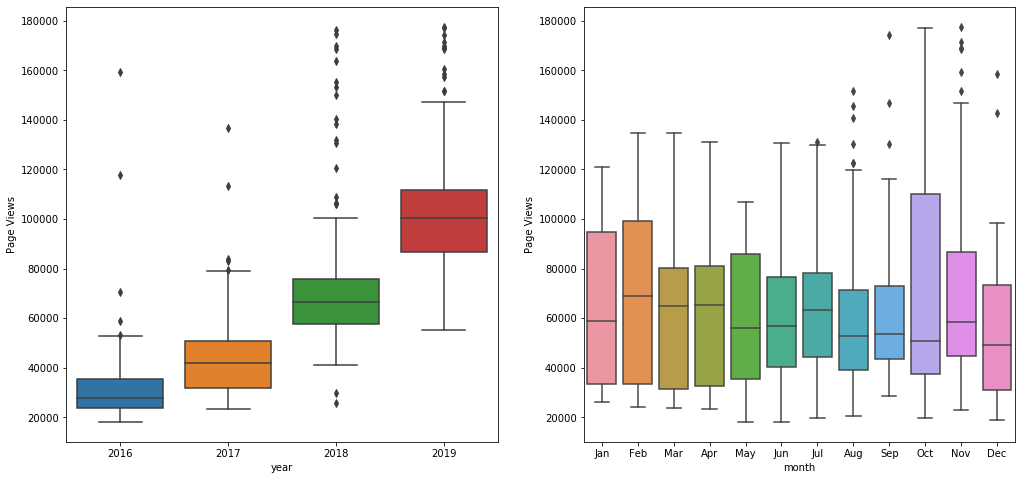

In [20]:
df['Page Views']=df['value']
fig, ax =plt.subplots(1,2)
fig.set_size_inches((17,8))
sns.boxplot(x='year',y='Page Views',data=df,ax=ax[0])
df["month"] = df["month"].apply(lambda data: data[:3])
sns.boxplot(x='month',y='Page Views',data=df,ax=ax[1])
